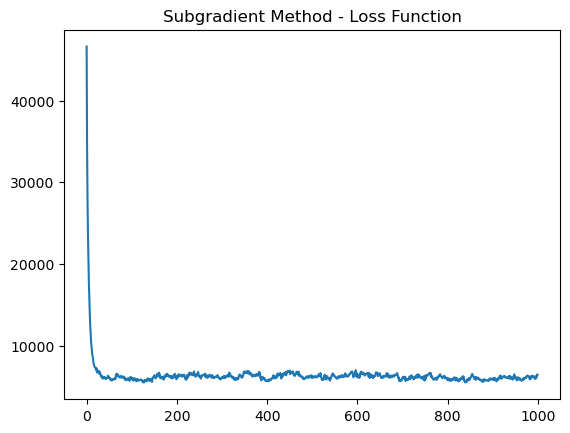

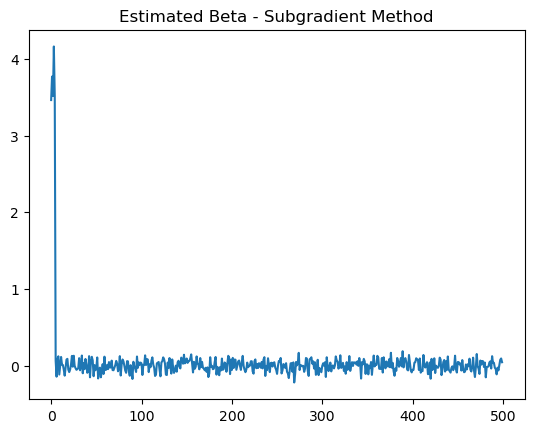

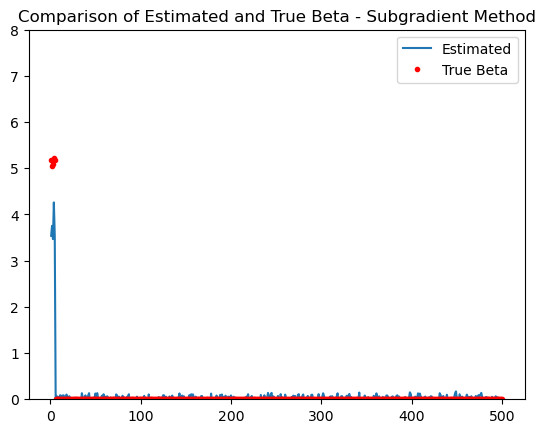

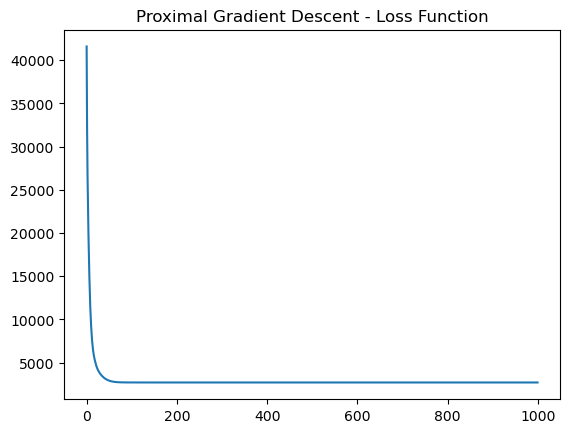

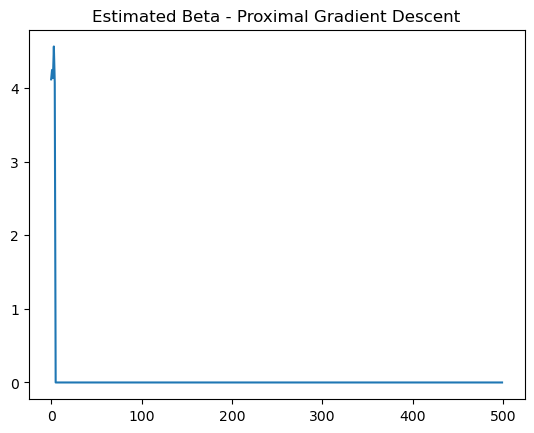

[ 4.11850943  4.24620833  4.13493937  4.56510282  4.0726327   0.
 -0.         -0.          0.         -0.          0.         -0.
 -0.          0.          0.         -0.         -0.          0.
  0.          0.         -0.         -0.          0.          0.
  0.          0.          0.          0.         -0.          0.
 -0.         -0.          0.         -0.          0.         -0.
  0.         -0.          0.         -0.          0.         -0.
  0.         -0.         -0.          0.         -0.         -0.
 -0.          0.         -0.          0.         -0.         -0.
  0.         -0.          0.          0.          0.          0.
  0.          0.         -0.         -0.         -0.         -0.
  0.         -0.          0.          0.         -0.          0.
  0.         -0.         -0.         -0.          0.         -0.
 -0.          0.          0.          0.         -0.         -0.
 -0.         -0.          0.         -0.          0.         -0.
  0.         -0.         

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 100
p = 500
np.random.seed(0)

# True beta values
beta0 = np.zeros(p)
beta0[0:5] = 5 + np.random.normal(0, 0.1, 5)

# Generate data
X = np.random.randn(n, p)
y = X @ beta0 + np.random.normal(0, 1, n)

# Lasso parameters
lam = 100
eps = 1e-3

# Objective function (f)
def f(beta):
    return np.sum((y - X @ beta)**2) + lam * np.sum(np.abs(beta))

# Subgradient function
def subgrad(beta):
    return -X.T @ (y - X @ beta) + lam * np.sign(beta)

# Subgradient method
beta = np.random.randn(p)
trace_beta = []
trace_fx = []

for i in range(1000):
    beta = beta - eps * subgrad(beta)
    f_beta = f(beta)
    trace_fx.append(f_beta)
    trace_beta.append(beta.copy())

# Plotting the loss function
plt.plot(trace_fx)
plt.title("Subgradient Method - Loss Function")
plt.show()

# Plot the estimated beta
plt.plot(beta)
plt.title("Estimated Beta - Subgradient Method")
plt.show()

# Plot comparison between estimated beta and true beta
plt.plot(np.arange(1, p+1), trace_beta[np.argmin(trace_fx)], label="Estimated")
plt.plot(np.arange(1, p+1), beta0, 'r.', label="True Beta")
plt.ylim([0, 8])
plt.legend()
plt.title("Comparison of Estimated and True Beta - Subgradient Method")
plt.show()

# Proximal operator
def prox(z, lam_t):
    return np.sign(z) * np.maximum(np.abs(z) - lam_t, 0)

# Proximal Gradient Descent
beta = np.random.randn(p)
trace_beta_pgd = []
trace_fx_pgd = []

for i in range(1000):
    beta = prox(beta - eps * (-X.T @ (y - X @ beta)), eps * lam)
    f_beta = f(beta)
    trace_fx_pgd.append(f_beta)
    trace_beta_pgd.append(beta.copy())

# Plot the loss function for Proximal Gradient Descent
plt.plot(trace_fx_pgd)
plt.title("Proximal Gradient Descent - Loss Function")
plt.show()

# Plot the estimated beta for Proximal Gradient Descent
plt.plot(beta)
plt.title("Estimated Beta - Proximal Gradient Descent")
plt.show()

# Final beta values after Proximal Gradient Descent
print(beta)
